In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.shape

(10866, 21)

In [4]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.dropna(inplace=True)


In [9]:
df.isnull().sum().any()

False

In [10]:
df.duplicated().sum()

0

In [12]:
df.shape

(1992, 21)

In [13]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

In [15]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


In [16]:
filter1 = df.budget > 0
filter2 = df.revenue > 0
filter3 = df.runtime > 0

In [17]:
df = df[ filter1 & filter2 & filter3]

In [18]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03
mean,52557.491064,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094,5.462994e+07,1.991775e+08
std,74450.077163,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503,5.525463e+07,2.968515e+08
min,11.000000,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01
25%,5851.500000,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000,1.519180e+07,2.764890e+07
50%,20178.000000,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000,3.556927e+07,8.674770e+07
75%,62209.500000,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000,7.630125e+07,2.351178e+08
max,333348.000000,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


In [24]:
df.nunique()

id                      1287
imdb_id                 1287
popularity              1286
budget                   228
revenue                 1285
original_title          1280
cast                    1278
homepage                1266
director                 789
tagline                 1283
keywords                1272
overview                1287
runtime                  102
genres                   496
production_companies    1138
release_date            1080
vote_count               894
vote_average              48
release_year              51
budget_adj               835
revenue_adj             1287
dtype: int64

In [25]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [26]:
df["genres"] = df.genres.astype("category")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    1287 non-null   int64   
 1   imdb_id               1287 non-null   object  
 2   popularity            1287 non-null   float64 
 3   budget                1287 non-null   int64   
 4   revenue               1287 non-null   int64   
 5   original_title        1287 non-null   object  
 6   cast                  1287 non-null   object  
 7   homepage              1287 non-null   object  
 8   director              1287 non-null   object  
 9   tagline               1287 non-null   object  
 10  keywords              1287 non-null   object  
 11  overview              1287 non-null   object  
 12  runtime               1287 non-null   int64   
 13  genres                1287 non-null   category
 14  production_companies  1287 non-null   object  
 15  rel

In [30]:
df.shape

(1287, 21)

In [45]:
df_gen=pd.DataFrame(data=df.genres.str.split('|').tolist(),index=[df.release_year,df.popularity]).stack() 
df_gen=df_gen.reset_index([0,1])
df_gen.rename(mapper={0:'genres'},axis=1,inplace=True)  


In [46]:
df_gen

,release_year,popularity,genres
0,2015,32.985763,Action
1,2015,32.985763,Adventure
2,2015,32.985763,Science Fiction
3,2015,32.985763,Thriller
0,2015,28.419936,Action
...,...,...,...
1,1969,1.778746,Action
2,1969,1.778746,Thriller
0,1978,1.198849,Horror
1,1978,1.198849,Thriller


In [47]:
df_gen.head(30)

,release_year,popularity,genres
0,2015,32.985763,Action
1,2015,32.985763,Adventure
2,2015,32.985763,Science Fiction
3,2015,32.985763,Thriller
0,2015,28.419936,Action
1,2015,28.419936,Adventure
2,2015,28.419936,Science Fiction
3,2015,28.419936,Thriller
0,2015,13.112507,Adventure
1,2015,13.112507,Science Fiction


Text(0, 0.5, 'Revenue')

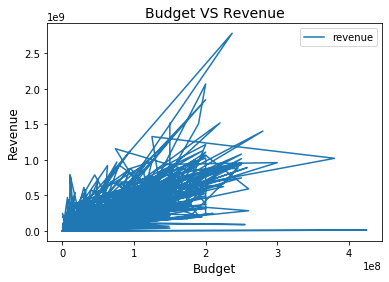

In [68]:
df.plot(x = 'budget' , y = 'revenue')
plt.title("Budget VS Revenue", fontsize =14)
plt.xlabel("Budget", fontsize = 12)
plt.ylabel("Revenue", fontsize = 12)

Text(0, 0.5, 'Count')

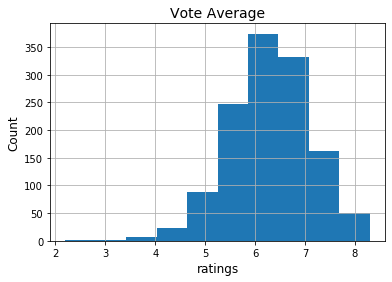

In [70]:
df['vote_average'].hist()
plt.title("Vote Average", fontsize =14)
plt.xlabel("ratings", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

Text(0, 0.5, 'Count')

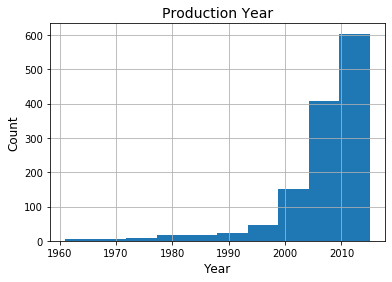

In [71]:
df['release_year'].hist()
plt.title("Production Year", fontsize =14)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

Text(0, 0.5, 'Count')

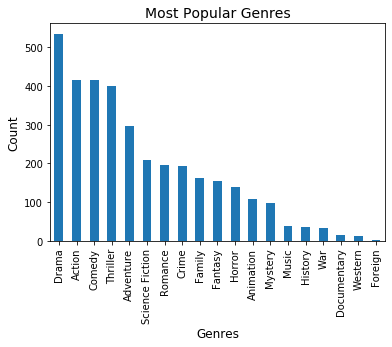

In [72]:
df_gen.genres.value_counts().plot.bar()
plt.title("Most Popular Genres", fontsize=14)
plt.xlabel("Genres", fontsize = 12)
plt.ylabel("Count", fontsize = 12)